# Описание

Самый простой фрактал

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def drawFractal(ax, gens, diffX, diffY, angleA=0, angleB=90):
    vec = lambda angle: np.array(
        (np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle)))
    )

    a = vec(angleA)
    b = vec(angleB)

    A = np.array([[a/2,-a/2]])

    coefX = lambda gen: diffX**(gen+1)
    coefY = lambda gen: diffY**(gen+1)

    for gen in range(gens):
        for j in range(2**gen):
            add = (a*coefX(gen))/2 if (gen%2 == 1) else (b*coefY(gen))/2
            A = np.concat(
                (A,
                [
                    [     # coord   component
                        A[2**gen-1+j][1] - add, 
                        A[2**gen-1+j][1] + add 
                    ],
                    [     # coord   component
                        A[2**gen-1+j][0] - add, 
                        A[2**gen-1+j][0] + add
                    ]
                ]),
                axis = 0
            )

    for i in range(len(A)):
        ax.plot(*A[i].T, c=color)
    ax.plot(*np.concat(([vec(angleA)/2], [[0,0]])).T, c = "green")
    ax.plot(*np.concat(([vec(angleB)/2], [[0,0]])).T, c = "red")

# fig, ax = plt.subplots(figsize=(8, 6))
# diff = 0.711
# drawFractal(ax, 10, diff, diff, 0, 90)


63 63


interactive(children=(FloatSlider(value=1.0, description='length', max=3.0, min=-1.0), IntSlider(value=4, desc…

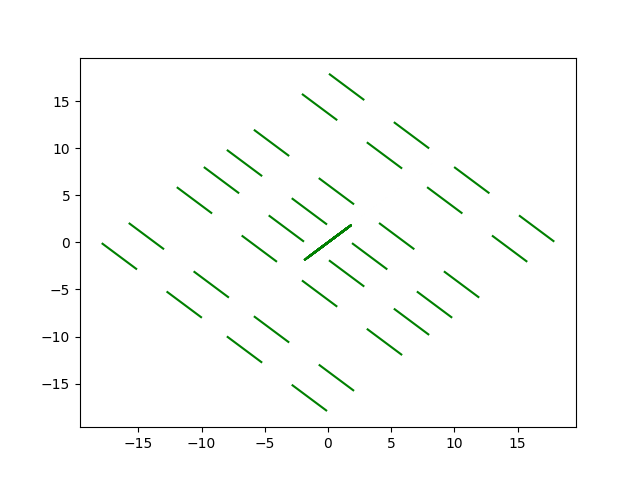

In [12]:
%matplotlib widget
from ipywidgets import *

A = drawFractal(7, 5, 0.60, 0.72, 45, 135)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
lines = []
for i in range(len(A)):
    line, = ax.plot(*A[i].T, c="green")
    lines.append(line)
# for i in range(len(A)):
#     print(*A[i].T, sep="test", end="end")

    # plt.plot(*A[i].T, c=color)
# plt.plot(*np.concat(([a], [[0,0]])).T, c = "green")
# plt.plot(*np.concat(([b], [[0,0]])).T, c = "red")

def update(length = 1.0, gens = 4, diffX=0.6, diffY=0.72, angleA=0, angleB=90):
    A = drawFractal(length, gens, diffX, diffY, angleA, angleB)
    # line, = ax.plot(x, a * np.sin(w * x))
    for i in range(len(A)):
        # print(i)
        plot = lines[i]
        plot.set_ydata(A[i].T)
        plot.set_xdata(A[i].T)
        # line.set_xdata(np.linspace(0, d * np.pi))
    fig.canvas.draw_idle()

interact(update);

# interact(
#     drawFractal, 
#     length = widgets.FloatSlider(value=7,min=0,max=10,step=0.1,description='Length'),
#     gens = widgets.IntSlider(value=2,min=0,max=6,step=1,description='Generations'),
#     diffX = widgets.IntSlider(value=7,min=0,max=10,step=1,description='DiffX'),
#     diffY = widgets.IntSlider(value=7,min=0,max=10,step=1,description='DiffY')
# )

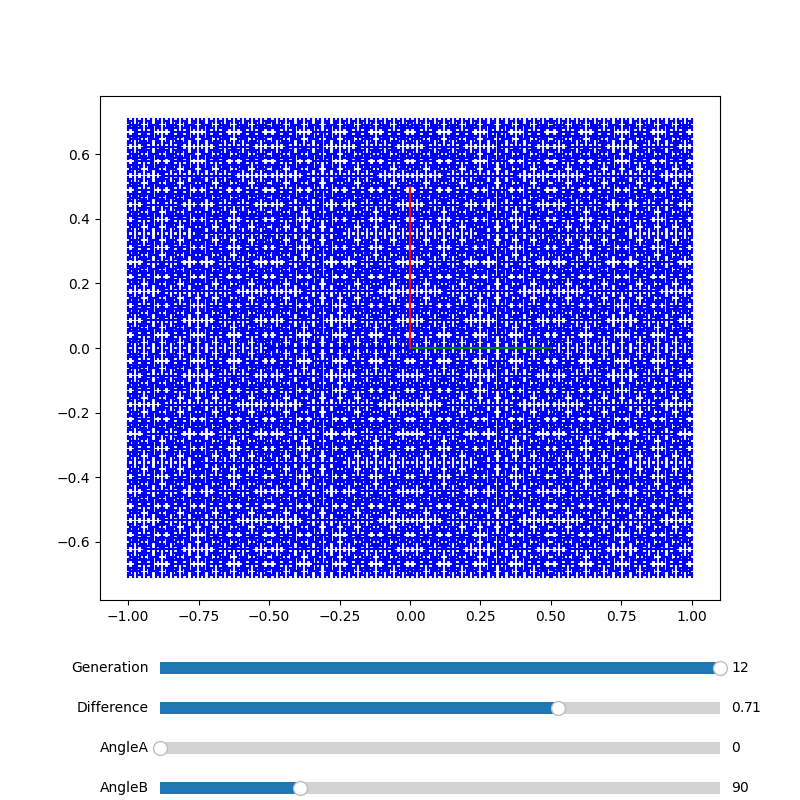

In [42]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def update(val):
    ax.clear()
    gens = gens_slider.val
    diff = diff_slider.val
    angleA = angleA_slider.val
    angleB = angleB_slider.val
    drawFractal(ax, gens, diff, diff, angleA, angleB)
    plt.draw()

fig, ax = plt.subplots(figsize=(8, 8))
plt.subplots_adjust(bottom=0.25)

# Начальная длина фрактала
color = "blue"
gens = 13

length = 100
angleA = 0
angleB = 90

diff = 0.71

drawFractal(ax, gens, diff, diff, angleA, angleB)
slider_size = (0.2, 0.7)

# Настраиваем слайдер
gens_slider = Slider(
    plt.axes([slider_size[0], 0.15, slider_size[1], 0.03]), 
    'Generation', 1, 12, 
    valstep=1, valinit=gens)
diff_slider = Slider(
    plt.axes([slider_size[0], 0.1, slider_size[1], 0.03]), 
    'Difference', 0, 1, 
    valinit=diff)
angleA_slider = Slider(
    plt.axes([slider_size[0], 0.05, slider_size[1], 0.03]), 
    'AngleA', 0, 360, 
    valstep=1, valinit=angleA)
angleB_slider = Slider(
    plt.axes([slider_size[0], 0, slider_size[1], 0.03]), 
    'AngleB', 0, 360, 
    valstep=1, valinit=angleB)

length_slider.on_changed(update)
gens_slider.on_changed(update)
diff_slider.on_changed(update)
angleA_slider.on_changed(update)
angleB_slider.on_changed(update)

plt.show()


In [9]:
import numpy as np

np.deg2rad(180.2)

np.float64(3.1450833120937816)

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), FloatSlider(value=1.0, descr…

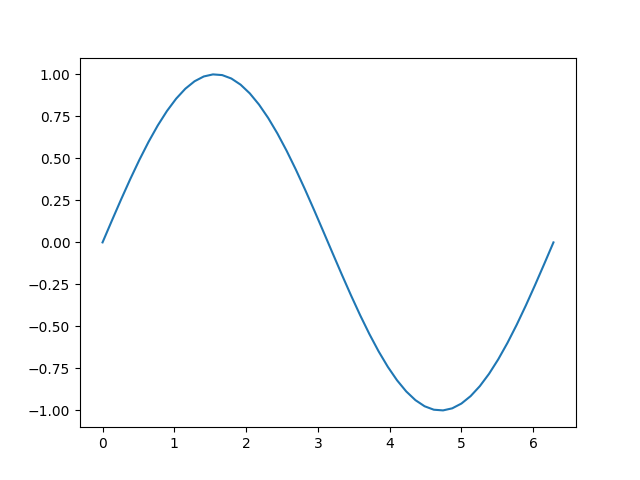

In [82]:
# %matplotlib widget
# from ipywidgets import *
# import numpy as np
# import matplotlib.pyplot as plt

# x = np.linspace(0, 2 * np.pi)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot(x, np.sin(x))

# def update(w = 1.0, a = 1.0, d=2.0):
#     # line, = ax.plot(x, a * np.sin(w * x))
#     line.set_ydata(a * np.sin(w * x))
#     line.set_xdata(np.linspace(0, d * np.pi))
#     fig.canvas.draw_idle()

# interact(update);